In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
class LinearRegression:
    def __init__(self, X , y):
        self.X = X
        self.y = y
        self.Weights = 0
        self.b = 0
        self.samples = len(X)
        self.loss = []
        self.output = []

    def mse(self,y_true, y_pred):
        squared_differences = (y_true - y_pred)**2
        
        return np.mean(squared_differences)

    def feed_forward(self):
        y_pred = self.Weights * self.X + self.b
        
        return y_pred

    def back_prop(self,y_hat):
        dw = (-2/self.samples)*sum(self.X * (self.y - y_hat))
        db = (-1/self.samples)*sum(self.y - y_hat)

        return dw,db
        
    def Gradient_descent(self,epochs,learning_rate,dw,db):
        self.Weights = self.Weights - learning_rate * dw
        self.b = self.b - learning_rate * db

    def predict(self , X):
        y_pred = self.Weights * X + self.b 
        
        return y_pred
        
    def fit(self,epochs,learning_rate):

        for i in range(epochs):
            y_pred = self.feed_forward()
            self.loss.append ( self.mse(self.y,y_pred)) #compute Loss per epoch
            #Backprop
            dw,db = self.back_prop(y_pred)
            #Updating Parameters weights
            self.Gradient_descent(epochs,learning_rate,dw,db)

            if i % 30 ==0:
                self.output.append(y_pred)          

In [134]:
df = pd.read_csv('Salary_dataset.csv') #load data
#Preparing the data
X = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,1])

In [142]:
epoch=200
learning_rate = .0001
regressor = LinearRegression(X,y)
regressor.fit(epoch , learning_rate)

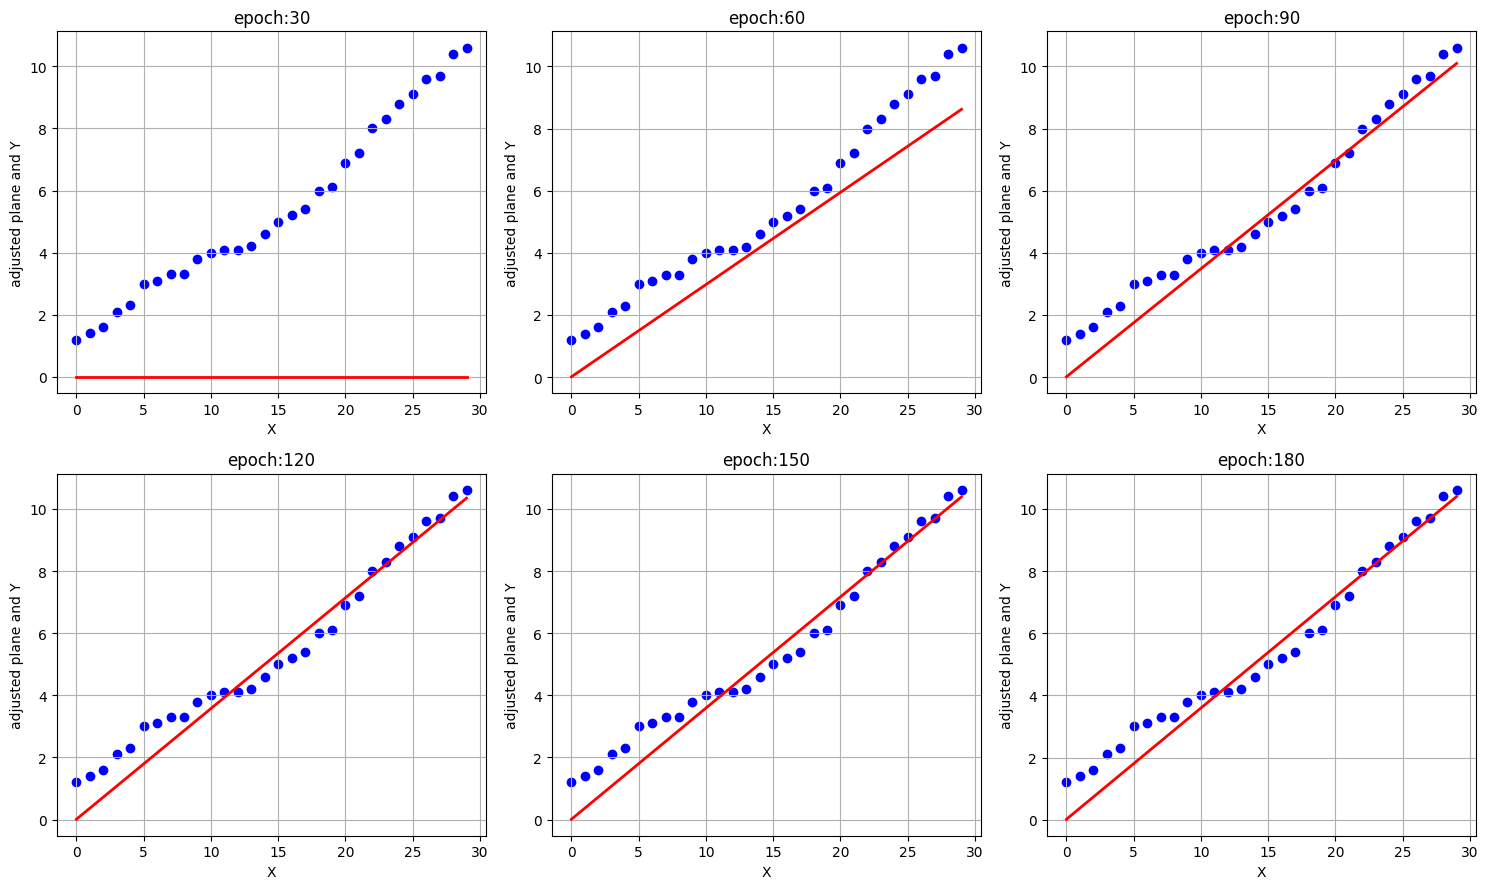

In [143]:
fig, ax = plt.subplots(2, 3, figsize=(15, 9))
l=0
for row in range(2):
    for col in range(3):

        ax[row,col].scatter(X,y , color = 'blue')
        ax[row,col].plot(X , regressor.output[l] , color = 'red' , lw = 2)
        # chart formatting
        ax[row,col].set_title('epoch:'+str((l+1)*30))
        #ax.get_legend().remove()
        ax[row,col].set_ylabel("adjusted plane and Y")
        ax[row,col].set_xlabel("X")
        ax[row,col].grid()
        l+=1

plt.tight_layout()
plt.show()

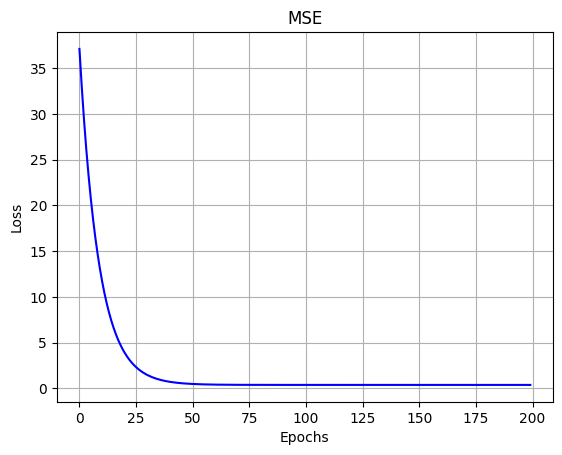

In [144]:
plt.plot(regressor.loss, 'blue')
plt.grid()
plt.title("MSE")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()